In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

assistance_df = pd.read_csv('/content/drive/Shareddrives/CIS 5450 Project/datasets/PublicAssistanceFundedProjectsDetails.csv')

Mounted at /content/drive


In [3]:
assistance_df.head()

,disasterNumber,declarationDate,incidentType,pwNumber,applicationTitle,applicantId,damageCategoryCode,projectSize,county,countyCode,...,stateNumberCode,projectAmount,federalShareObligated,totalObligated,obligatedDate,dcc,damageCategory,lastRefresh,hash,id
0,1239,1998-08-26T00:00:00.000Z,Severe Storm,1,IMMEDIATE NEEDS FUNDING,465-19792-00,B - Protective Measures,Large,Val Verde,465.0,...,48,100000.00,75000.00,80340.00,1998-09-15T00:00:00.000Z,B,Protective Measures,2023-03-18T17:02:21.032Z,ab44f45c1d8c17a851c502843931634518fb37e6,145230ef-5029-43b6-bf93-24f60d786b9d
1,1239,1998-08-26T00:00:00.000Z,Severe Storm,2,(L),465-19792-01,F - Public Utilities,Large,Val Verde,465.0,...,48,423791.13,317843.35,333171.72,1998-09-17T00:00:00.000Z,F,Public Utilities,2023-03-18T17:02:21.032Z,4428e2c912affed5a02afd89f5b58c97a57193ac,26dab167-6dee-4ae9-a66f-28dce5d8f254
2,1239,1998-08-26T00:00:00.000Z,Severe Storm,3,L,465-99465-00,C - Roads and Bridges,Large,Val Verde,465.0,...,48,66966.19,50224.64,53975.01,1998-09-21T00:00:00.000Z,C,Roads and Bridges,2023-03-18T17:02:21.032Z,000de54594e126d1991c514c618053565c854ddb,fa365e8a-7e81-4ef8-a03f-0ef2b28dd6a1
3,1239,1998-08-26T00:00:00.000Z,Severe Storm,4,Not Provided,465-062A0-00,C - Roads and Bridges,Small,Val Verde,465.0,...,48,22305.00,16728.75,17745.86,1998-09-21T00:00:00.000Z,C,Roads and Bridges,2023-03-18T17:02:21.032Z,8d0b5dc63472e0caba5689802ca1c06f315f33f6,ec0980af-e42a-45fa-b896-0f8d243fc02b
4,1239,1998-08-26T00:00:00.000Z,Severe Storm,5,Not Provided,465-19792-02,G - Recreational or Other,Small,Val Verde,465.0,...,48,19685.50,14764.13,15461.00,1998-09-23T00:00:00.000Z,G,Recreational or Other,2023-03-18T17:02:21.032Z,a41b01a0fa0ea18cc903f3ba2c7709a700538619,eb1a1a1a-6ebc-4f43-a824-cd05d35883d3


In [4]:
assistance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797674 entries, 0 to 797673
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   disasterNumber         797674 non-null  int64  
 1   declarationDate        797674 non-null  object 
 2   incidentType           797674 non-null  object 
 3   pwNumber               797674 non-null  int64  
 4   applicationTitle       791452 non-null  object 
 5   applicantId            797674 non-null  object 
 6   damageCategoryCode     797674 non-null  object 
 7   projectSize            784666 non-null  object 
 8   county                 784666 non-null  object 
 9   countyCode             784666 non-null  float64
 10  state                  797674 non-null  object 
 11  stateCode              797674 non-null  object 
 12  stateNumberCode        797674 non-null  int64  
 13  projectAmount          797674 non-null  float64
 14  federalShareObligated  797674 non-nu

## Preprocessing

In [5]:
assistance_df_copy = assistance_df.copy()

In [6]:
# convert the date column to datetime
assistance_df_copy['declarationDate'] = pd.to_datetime(assistance_df_copy['declarationDate'])

In [7]:
assistance_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797674 entries, 0 to 797673
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   disasterNumber         797674 non-null  int64              
 1   declarationDate        797674 non-null  datetime64[ns, UTC]
 2   incidentType           797674 non-null  object             
 3   pwNumber               797674 non-null  int64              
 4   applicationTitle       791452 non-null  object             
 5   applicantId            797674 non-null  object             
 6   damageCategoryCode     797674 non-null  object             
 7   projectSize            784666 non-null  object             
 8   county                 784666 non-null  object             
 9   countyCode             784666 non-null  float64            
 10  state                  797674 non-null  object             
 11  stateCode              797674 non-null 

## Time Series Graphs

#### Total Obligated Funds by Year

In [ ]:
assistance_df_copy['Year'] = assistance_df_copy['declarationDate'].dt.year

In [ ]:
obligated_df = assistance_df_copy.groupby('Year')[['totalObligated']].sum()

Text(0, 0.5, 'Total Obligated')

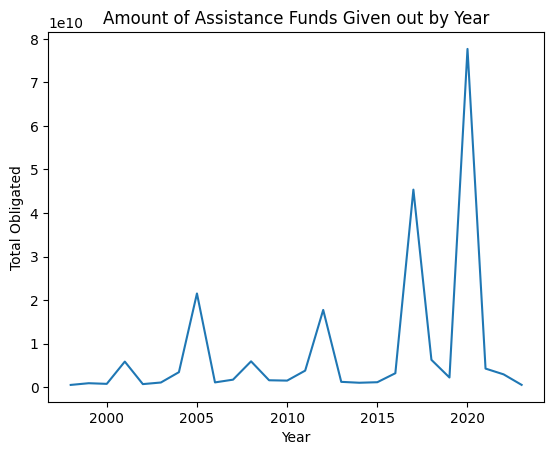

In [ ]:
plt.plot(obligated_df)
plt.title('Amount of Assistance Funds Given out by Year')
plt.xlabel('Year')
plt.ylabel('Total Obligated')

#### Project Amount by Year

In [ ]:
project_df = assistance_df_copy.groupby('Year')[['projectAmount']].sum()


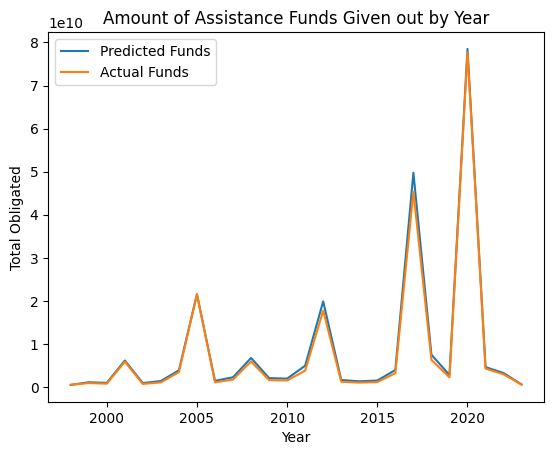

<Figure size 2000x600 with 0 Axes>

In [ ]:
plt.plot(project_df, label='Predicted Funds')
plt.plot(obligated_df, label='Actual Funds')
# rename legend
plt.legend(loc='upper left')
plt.title('Amount of Assistance Funds Given out by Year')
plt.xlabel('Year')
plt.ylabel('Total Obligated')

plt.figure(figsize=(20, 6))
plt.show()


#### Project Size by Year

In [ ]:
assistance_df_copy['projectSize'].value_counts()

Small    651455
Large    133211
Name: projectSize, dtype: int64

In [ ]:
size_df = assistance_df_copy.groupby(['Year', 'projectSize'])[['disasterNumber']].count()

In [ ]:
size_df2 = assistance_df_copy.groupby(['Year', 'projectSize'])[['disasterNumber']].mean()

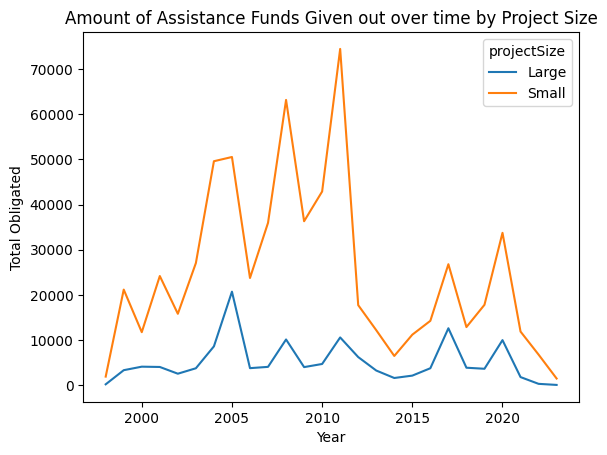

In [ ]:
sns.lineplot(data = size_df, x= 'Year', y = 'disasterNumber', hue = 'projectSize')
#add axes titles
plt.title('Amount of Assistance Funds Given out over time by Project Size')
plt.xlabel('Year')
plt.ylabel('Total Obligated')
plt.show()



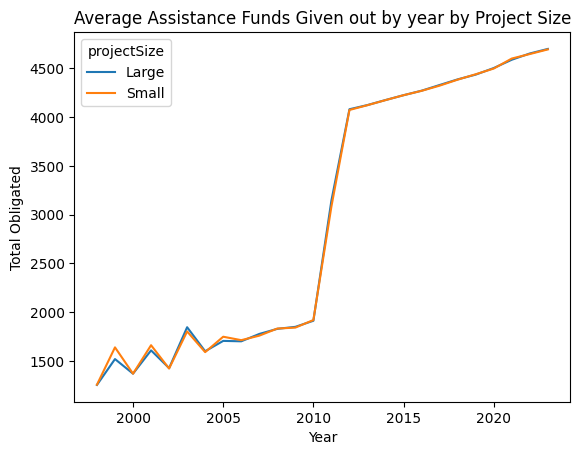

In [ ]:
sns.lineplot(data = size_df2, x= 'Year', y = 'disasterNumber', hue = 'projectSize')
#add axes titles
plt.title('Average Assistance Funds Given out by year by Project Size')
plt.xlabel('Year')
plt.ylabel('Total Obligated')
plt.show()

## Bar Graphs

#### Funding Amount by State

In [ ]:
funding_state_df = assistance_df_copy.groupby(['stateNumberCode'])[['totalObligated']].sum().sort_values('totalObligated', ascending=False).reset_index()
funding_state_df['state_as_category'] = funding_state_df['stateNumberCode'].astype('object')

In [ ]:
funding_state_df2 = assistance_df_copy.groupby(['state'])[['totalObligated']].sum().sort_values('totalObligated', ascending=False).reset_index()

In [ ]:
disaster_df = pd.read_csv("/content/drive/Shareddrives/CIS 5450 Project/datasets/DisasterDeclarationsSummaries.csv")
disaster_df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5389-AZ,5389,AZ,FM,2021-06-06T00:00:00.000Z,2021,Fire,TELEGRAPH FIRE,0,0,...,0,4,7,99007,Gila (County),21041,NaN,2023-09-29T21:02:14.142Z,14b4a2c314124cae33e8ec790782a12c2af10a4c,226d44a3-418a-4102-9a55-385ea6599b2a
1,FM-5389-AZ,5389,AZ,FM,2021-06-06T00:00:00.000Z,2021,Fire,TELEGRAPH FIRE,0,0,...,0,4,21,99021,Pinal (County),21041,NaN,2023-09-29T21:02:14.142Z,971d2204fdd213515f78a8575ca6fb14e66ca6fb,7304770a-6040-4bb2-b515-a50ffccefa40
2,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,0,0,...,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,NaN,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c
3,FM-5463-KS,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,0,0,...,0,20,201,99201,Washington (County),23038,NaN,2023-05-22T03:41:22.800Z,78dd55a181f146622eb65835b5d794689d1ea7f2,57d936ce-a0d7-412a-9d78-18aee530c146
4,FM-5462-NE,5462,NE,FM,2023-04-09T00:00:00.000Z,2023,Fire,WACONDA-BEAVER LAKE FIRE COMPLEX,0,0,...,0,31,25,99025,Cass (County),23036,NaN,2023-05-22T03:41:22.800Z,5b35b5912f606a21ff29194317052ac7c2541be8,69325b2c-77cf-493f-8f1a-d5b5a737edf8


In [ ]:
merged_df1 = funding_state_df.merge(disaster_df, left_on = 'state_as_category', right_on = 'fipsStateCode')

In [ ]:
merged_df = merged_df1[['state_as_category', 'totalObligated', 'state']]

In [ ]:
merged_df.head()

,state_as_category,totalObligated,state
0,36,3.567741e+10,NY
1,36,3.567741e+10,NY
2,36,3.567741e+10,NY
3,36,3.567741e+10,NY
4,36,3.567741e+10,NY


In [ ]:
state_mentions = assistance_df_copy.groupby(['state'])[['disasterNumber']].count().sort_values('disasterNumber', ascending=False).reset_index()

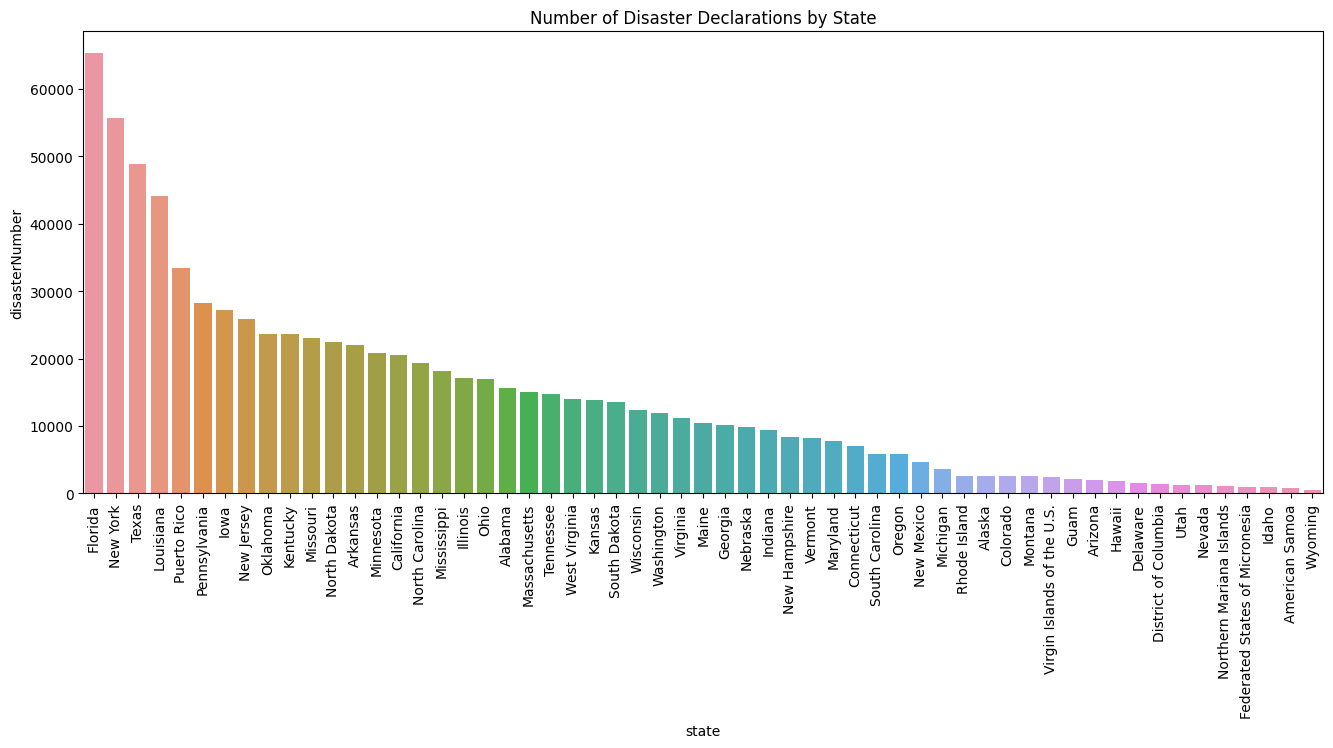

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = state_mentions, x = 'state', y = 'disasterNumber')
plt.title('Number of Disaster Declarations by State')
plt.xticks(rotation = 90)
plt.show()

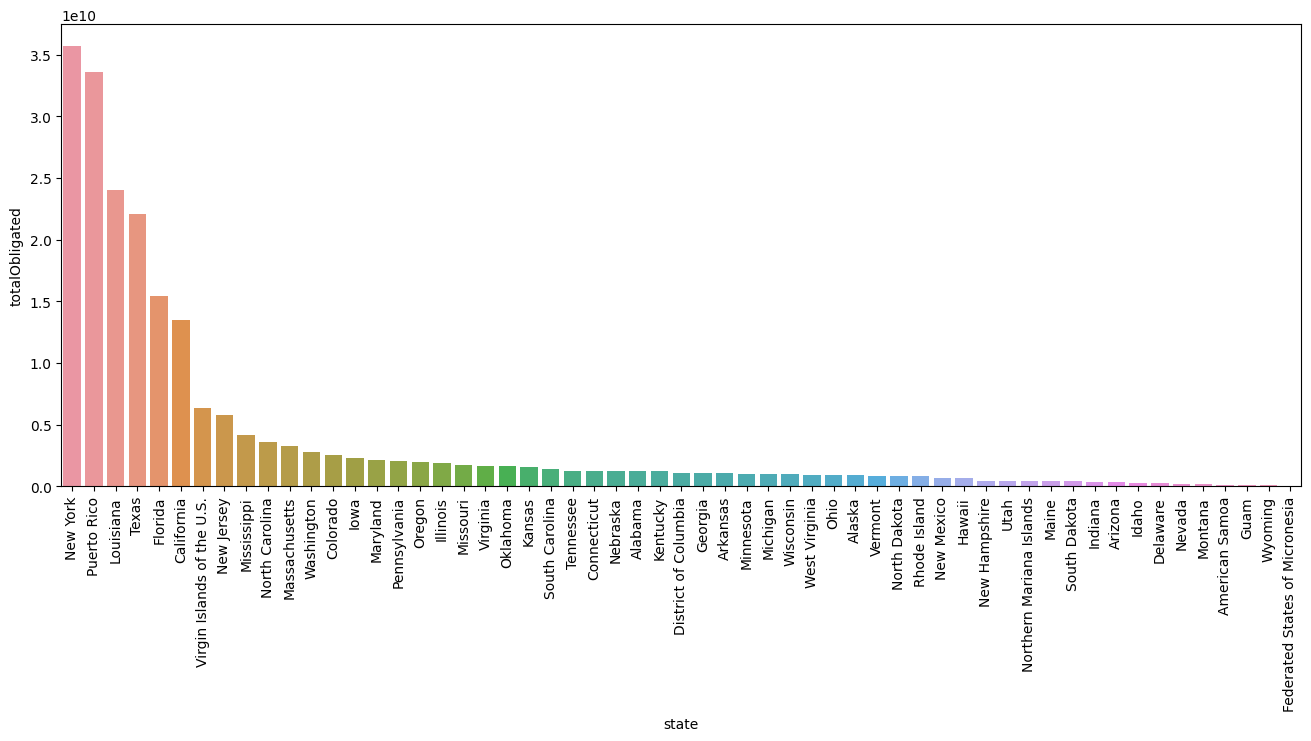

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = funding_state_df2, x = 'state', y = 'totalObligated')
plt.xticks(rotation = 90)
plt.show()

Total obligated per year for the top 6 states

In [ ]:
states_to_filter = ['New York', 'Puerto Rico', 'Louisiana', 'Texas', 'Florida', 'California']

In [ ]:
top_states_df2 = assistance_df_copy[assistance_df_copy['state'].isin(states_to_filter)]

In [ ]:
#merged2 = assistance_df_copy.merge(disaster_df2, left_on = 'stateNumberCode', right_on = 'fipsStateCode')

In [ ]:
#merged_df1 = merged_df1[merged_df1['state'].isin(states_to_filter)]

In [ ]:
top_states_df = top_states_df2.groupby(['Year', 'state'])[['totalObligated']].sum().sort_values('totalObligated', ascending=False).reset_index()

In [ ]:
top_states_df['Year'].value_counts().sort_index()


1998    2
1999    5
2000    4
2001    5
2002    3
2003    6
2004    5
2005    6
2006    4
2007    4
2008    6
2009    4
2010    4
2011    5
2012    3
2013    5
2014    3
2015    3
2016    3
2017    6
2018    3
2019    5
2020    6
2021    5
2022    3
2023    4
Name: Year, dtype: int64

Text(0.5, 1.0, 'Amount of Assistance Funds Given out by Year for the Top 6 States')

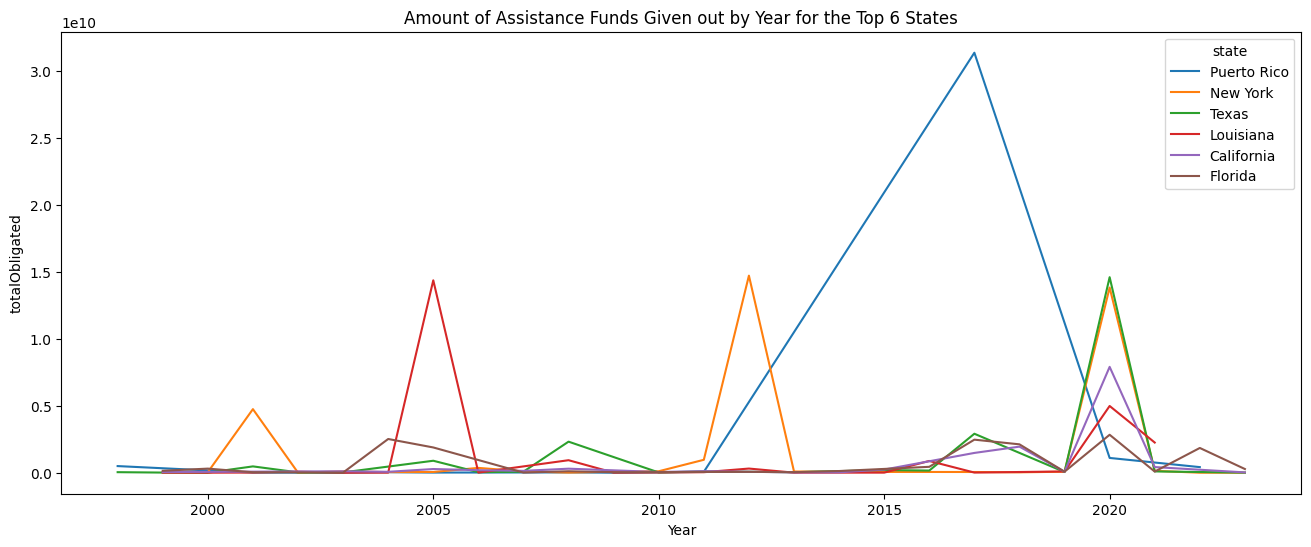

In [ ]:
plt.figure(figsize = (16,6))
sns.lineplot(data = top_states_df, x= 'Year', y = 'totalObligated', hue = 'state')
plt.title('Amount of Assistance Funds Given out by Year for the Top 6 States')

<Axes: xlabel='Year', ylabel='totalObligated'>

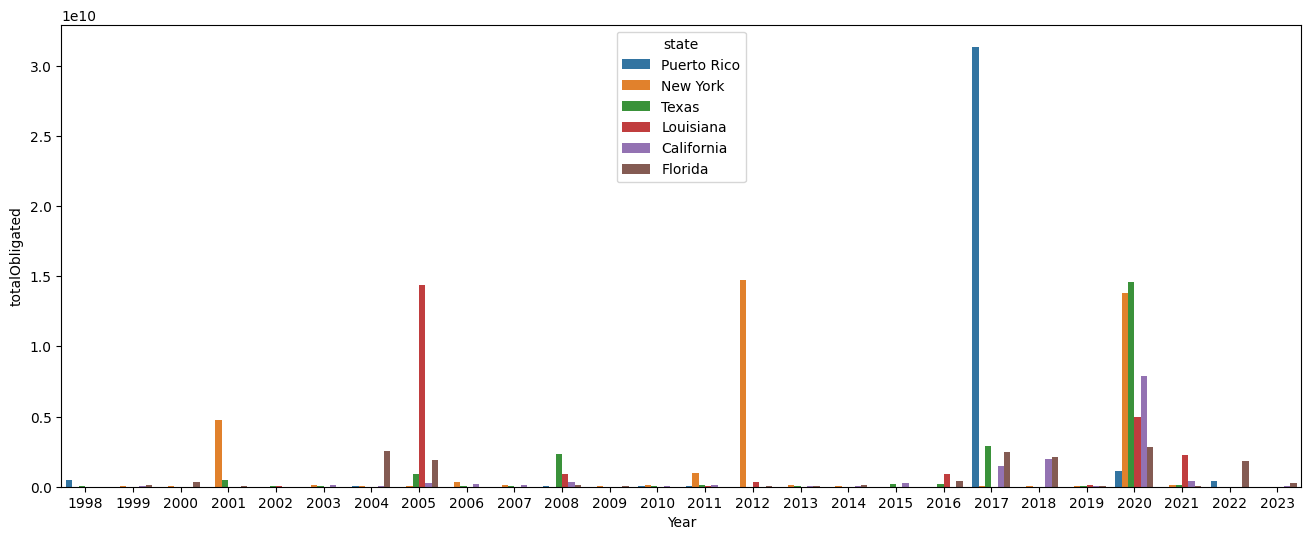

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = top_states_df, x = 'Year', y = 'totalObligated', hue = 'state')

In [ ]:
top_states_df_avg = top_states_df.groupby(['Year', 'state'])[['totalObligated']].mean().sort_values('totalObligated', ascending=False).reset_index()

In [ ]:
assistance_df_copy['state'].value_counts()

Florida                           65274
New York                          55635
Texas                             48812
Louisiana                         44042
Puerto Rico                       33387
Pennsylvania                      28272
Iowa                              27129
New Jersey                        25799
Kentucky                          23603
Oklahoma                          23603
Missouri                          23019
North Dakota                      22471
Arkansas                          22036
Minnesota                         20807
California                        20479
North Carolina                    19314
Mississippi                       18126
Illinois                          17128
Ohio                              16931
Alabama                           15628
Massachusetts                     14999
Tennessee                         14675
West Virginia                     13964
Kansas                            13865
South Dakota                      13618


In [ ]:
assistance_df_copy['incidentType'].value_counts()

Severe Storm         335804
Hurricane            251696
Flood                 87320
Snowstorm             35732
Biological            30698
Severe Ice Storm      25331
Fire                   9947
Tornado                6355
Earthquake             5049
Typhoon                4135
Coastal Storm          3053
Other                  1142
Mud/Landslide           321
Winter Storm            271
Freezing                200
Dam/Levee Break         199
Tsunami                 181
Terrorist               107
Volcanic Eruption        78
Chemical                 54
Drought                   1
Name: incidentType, dtype: int64

In [ ]:
top_incident_types = ['Severe Storm', 'Hurricane', 'Flood', 'Snowstorm']

In [ ]:
top_incident_df = assistance_df_copy[assistance_df_copy['incidentType'].isin(top_incident_types)]

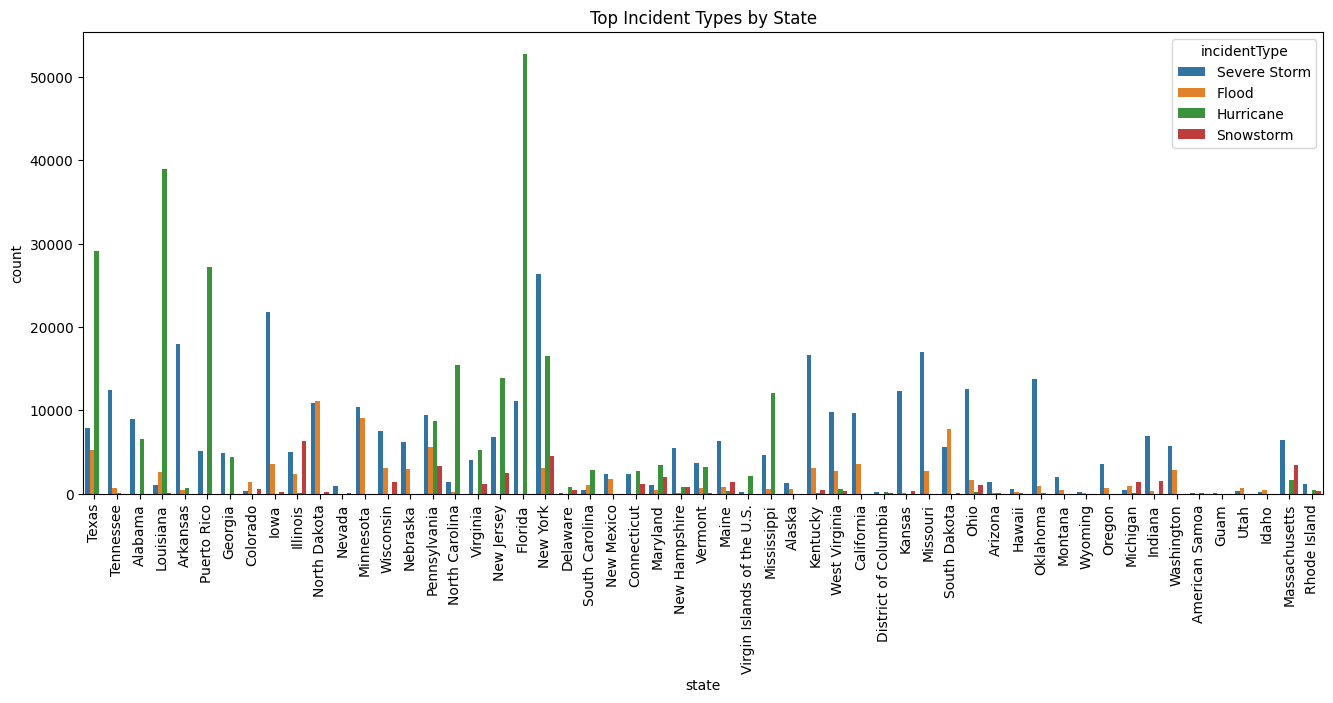

In [ ]:
plt.figure(figsize = (16,6))
sns.countplot(data = top_incident_df, x = 'state', hue = 'incidentType')
plt.xticks(rotation = 90)
plt.title('Top Incident Types by State')
plt.show()

In [8]:
incident_funds = assistance_df_copy.groupby(['incidentType'])[['totalObligated']].mean().sort_values('totalObligated', ascending=False).reset_index()

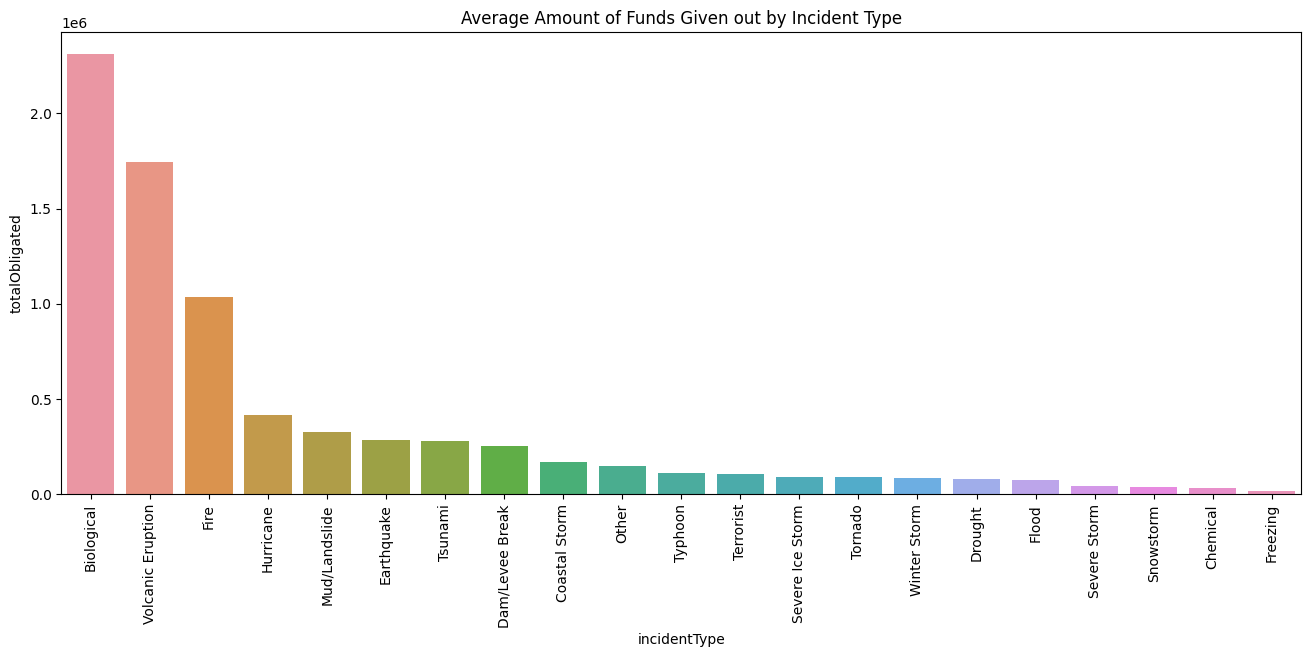

In [11]:
plt.figure(figsize = (16,6))
sns.barplot(data = incident_funds, x = 'incidentType', y = 'totalObligated')
plt.title('Average Amount of Funds Given out by Incident Type')
plt.xticks(rotation = 90)
plt.show()

In [12]:
incident_funds_damage = assistance_df_copy.groupby(['damageCategory'])[['totalObligated']].mean().sort_values('totalObligated', ascending=False).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Public Utilities'),
  Text(1, 0, 'State Management'),
  Text(2, 0, 'Protective Measures'),
  Text(3, 0, 'Public Buildings'),
  Text(4, 0, 'Debris Removal'),
  Text(5, 0, 'Water Control Facilities'),
  Text(6, 0, 'Recreational or Other'),
  Text(7, 0, 'Roads and Bridges')])

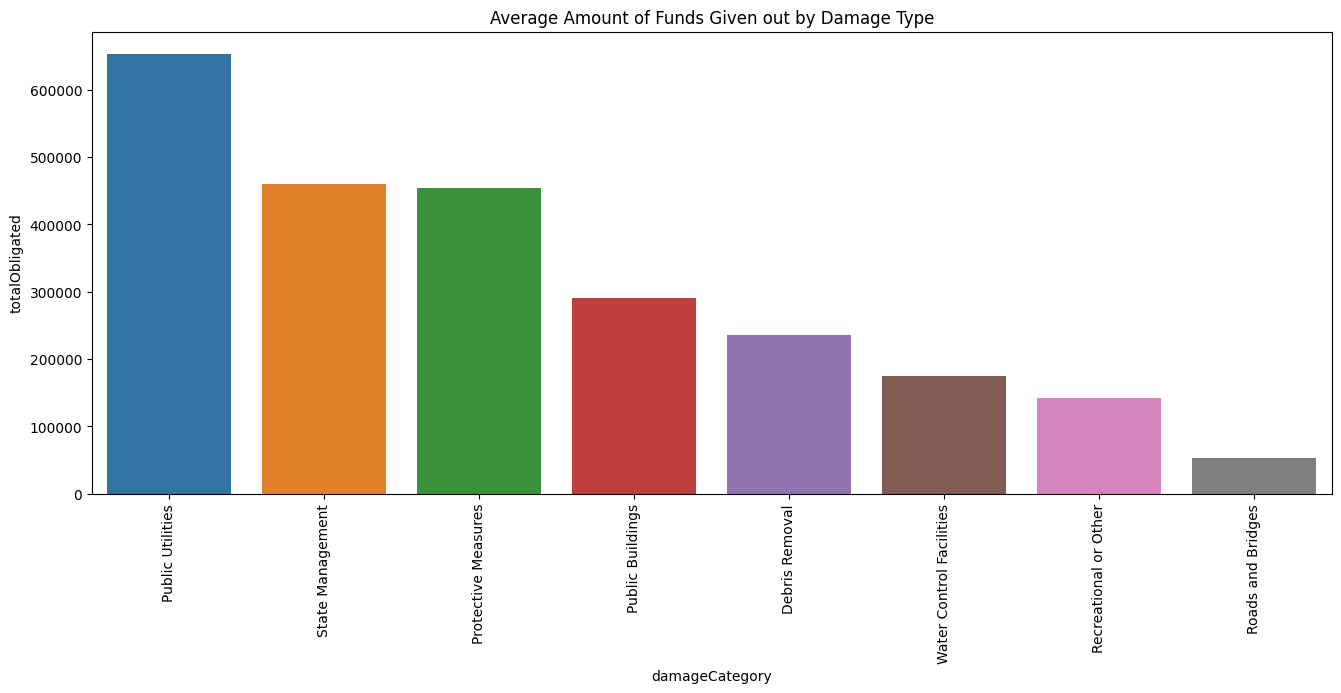

In [13]:
plt.figure(figsize = (16,6))
sns.barplot(data = incident_funds_damage, x = 'damageCategory', y = 'totalObligated')
plt.title('Average Amount of Funds Given out by Damage Type')
plt.xticks(rotation = 90)